In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
class DatasetLoader:
    @staticmethod
    def load_dataset():
        # load the x_dataset 
        with open("dataset/x_dataset.npy", "rb") as x_dataset_file:
            x_dataset = np.load(x_dataset_file)
        # load the y_dataset
        with open("dataset/y_dataset.npy", "rb") as y_dataset_file:
            y_dataset = np.load(y_dataset_file)

        # return the loaded datasets
        return x_dataset, y_dataset

In [4]:
# get datasets
data = DatasetLoader()
x_dataset, y_dataset = data.load_dataset()

In [8]:
# split dataset to train and test sets (80% - 20%)
x_train, x_test, y_train, y_test = train_test_split(
    x_dataset, y_dataset, test_size=0.2, random_state=42)

In [9]:
# define polynom degrees
degrees = [1, 2, 3, 20]

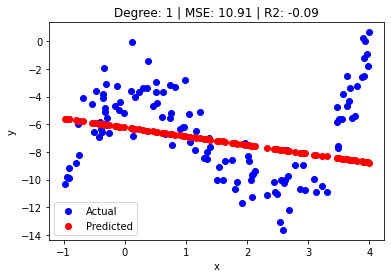

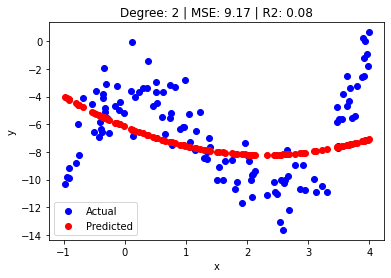

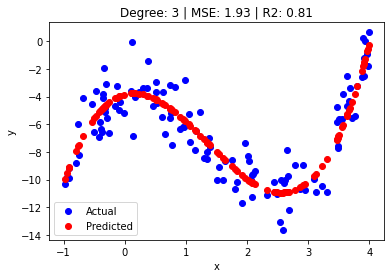

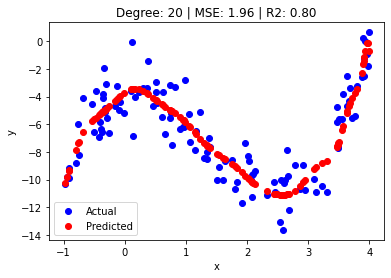

In [11]:
# training and evaluating a polynomial regression model for each stage
for degree in degrees:
    # reshaping input arrays in 2D
    x_train_reshaped = x_train.reshape(-1, 1)
    x_test_reshaped = x_test.reshape(-1, 1)

    # creation of polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_poly = polynomial_features.fit_transform(x_train_reshaped)
    x_test_poly = polynomial_features.transform(x_test_reshaped)

    # model training
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # predictions on test set
    y_pred = model.predict(x_test_poly)

    # calculation of squared error and model quality
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # display of actual and predictive values
    plt.scatter(x_test, y_test, color='blue', label='Actual')
    plt.scatter(x_test, y_pred, color='red', label='Predicted')
    plt.title(f"Degree: {degree} | MSE: {mse:.2f} | R2: {r2:.2f}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()